<a href="https://colab.research.google.com/github/DanielaRandazo/coderhouse/blob/main/Data_Wrangling_Daniela_Randazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB
# DATA WRANGLING


In [22]:
from google.colab import drive
drive.mount('/CoderHouse')

Drive already mounted at /CoderHouse; to attempt to forcibly remount, call drive.mount("/CoderHouse", force_remount=True).


# Importo Librerias

In [23]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
DF_IMDB = pd.read_csv('/CoderHouse/MyDrive/CoderHouse/IMDB.csv')

In [24]:
print(DF_IMDB.columns)

Index(['Unnamed: 0', 'index', 'tconst', 'titleType', 'primaryTitle',
       'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes',
       'genres', 'averageRating', 'numVotes', 'ordering', 'title', 'region',
       'language', 'types', 'attributes', 'isOriginalTitle', 'Description'],
      dtype='object')



# ***Analisis y evolucion de la industria cinematografica a nivel mundial en las ultimas decadas***
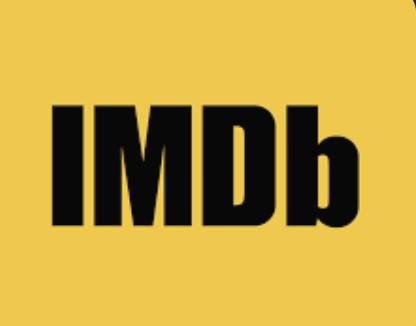


# Analisis de valores nulos y NaN:

In [25]:
#cantidad de valores nulos por columna

DF_IMDB.isna().sum().sort_values(ascending=False)

Description        188
averageRating        0
isOriginalTitle      0
attributes           0
types                0
language             0
region               0
title                0
ordering             0
numVotes             0
Unnamed: 0           0
index                0
runtimeMinutes       0
endYear              0
startYear            0
isAdult              0
originalTitle        0
primaryTitle         0
titleType            0
tconst               0
genres               0
dtype: int64

In [32]:
DF_IMDB.replace('\\N', pd.NA, inplace=True)
DF_IMDB["endYear"] = pd.to_numeric(DF_IMDB["endYear"], errors="coerce")

# Imprimir la cantidad de NaN por columna
cantidad_nan_por_columna = DF_IMDB.isna().sum()
print(cantidad_nan_por_columna)


/usr/local/lib/python3.10/dist-packages/pandas/core/missing.py:95: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  new_mask = arr == x


AttributeError: ignored

In [27]:
DF_IMDB.dtypes

Unnamed: 0           int64
index                int64
tconst              object
titleType           object
primaryTitle        object
originalTitle       object
isAdult              int64
startYear            int64
endYear            float64
runtimeMinutes      object
genres              object
averageRating      float64
numVotes             int64
ordering             int64
title               object
region              object
language            object
types               object
attributes          object
isOriginalTitle      int64
Description         object
dtype: object

In [33]:
#quiero analizar los valores no numericos de mi columna endYear

DF_IMDB["endYear"] = pd.to_numeric(DF_IMDB["endYear"], errors="coerce")

valores_no_numericos = DF_IMDB.loc[pd.to_numeric(DF_IMDB["endYear"], errors="coerce").isnull(), "endYear"]
# Imprimir los valores no numéricos
print(valores_no_numericos)


Series([], Name: endYear, dtype: float64)


In [34]:
#voy a rellenar los valores NaN de la columna endYear con el promedio de anios que tengo de esa columna

DF_IMDB["endYear"] = pd.to_numeric(DF_IMDB["endYear"], errors="coerce")

# Calculo el promedio de los años excluyendo NaN
promedio_anios = DF_IMDB["endYear"].mean(skipna=True)

# Reemplazo NaN con el promedio de los años en la columna "endYear"
DF_IMDB["endYear"].fillna(promedio_anios, inplace=True)

# Imprimo el DataFrame actualizado
print(DF_IMDB)


      Unnamed: 0  index     tconst titleType  \
0              0      0  tt0102926     movie   
1              1      1  tt0103064     movie   
2              2      3  tt0110357     movie   
3              3      4  tt0110912     movie   
4              4      5  tt0111161     movie   
...          ...    ...        ...       ...   
7845        7845  10269  tt9789686     movie   
7846        7846  10270  tt9814900  tvSeries   
7847        7847  10271  tt9845110     movie   
7848        7848  10272  tt9845398     movie   
7849        7849  10274  tt9908860  tvSeries   

                                primaryTitle  \
0                   The Silence of the Lambs   
1                 Terminator 2: Judgment Day   
2                              The Lion King   
3                               Pulp Fiction   
4                   The Shawshank Redemption   
...                                      ...   
7845                          The Blonde One   
7846  Trailer Park Boys: The Animated S

In [35]:
#Evaluation of missing Data
#"True" stands for missing value, while "False" stands for not missing value.

missing_data = DF_IMDB.isnull()
missing_data.head(5)

,Unnamed: 0,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,...,averageRating,numVotes,ordering,title,region,language,types,attributes,isOriginalTitle,Description
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False


In [36]:
#Count missing values in each column


for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Unnamed: 0
False    7850
Name: Unnamed: 0, dtype: int64

index
False    7850
Name: index, dtype: int64

tconst
False    7850
Name: tconst, dtype: int64

titleType
False    7850
Name: titleType, dtype: int64

primaryTitle
False    7850
Name: primaryTitle, dtype: int64

originalTitle
False    7850
Name: originalTitle, dtype: int64

isAdult
False    7850
Name: isAdult, dtype: int64

startYear
False    7850
Name: startYear, dtype: int64

endYear
False    7850
Name: endYear, dtype: int64

runtimeMinutes
False    7727
True      123
Name: runtimeMinutes, dtype: int64

genres
False    7848
True        2
Name: genres, dtype: int64

averageRating
False    7850
Name: averageRating, dtype: int64

numVotes
False    7850
Name: numVotes, dtype: int64

ordering
False    7850
Name: ordering, dtype: int64

title
False    7850
Name: title, dtype: int64

region
False    7850
Name: region, dtype: int64

language
False    7850
Name: language, dtype: int64

types
False    7480
True      370
Name: types, dtyp

Based on the query above we can see that only Description has missing data.
All the other columns don't have missing date.

In [37]:
#print(DF_IMDB['Description'])


filas_nulas = DF_IMDB[DF_IMDB['Description'].isnull()]

# Imprimir las filas con valores nulos en 'nombre_columna'
print(filas_nulas)

      Unnamed: 0  index      tconst  titleType        primaryTitle  \
47            47    167   tt0919370  tvEpisode           Encounter   
50            50    177   tt0947906  tvEpisode               Wager   
52            52    181   tt0950513  tvEpisode           Execution   
54            54    190   tt0990612  tvEpisode             Revival   
82            82    281  tt11866324      movie                Prey   
...          ...    ...         ...        ...                 ...   
7769        7769  10176   tt7843600      movie          Fyre Fraud   
7778        7778  10185   tt8015444      movie  Last and First Men   
7799        7799  10211   tt8359842      movie   It Must Be Heaven   
7828        7828  10246   tt9118930   tvSeries           Wild Bill   
7837        7837  10259   tt9581076      movie     So Long, My Son   

           originalTitle  isAdult  startYear      endYear runtimeMinutes  ...  \
47              Sesshoku        0       2006  2015.847293             23  ... 

In [38]:
pip install tabulate


In [39]:
import pandas as pd
from tabulate import tabulate

# Supongamos que ya tienes un DataFrame llamado DF_IMDB
# Armo mi DataFrame con las columnas que yo quiero
columnas_seleccionadas = ['titleType', 'primaryTitle', 'originalTitle', 'startYear', 'numVotes', 'title', 'genres']

# Seleccionar solo las columnas deseadas del DataFrame
DF_seleccionado = DF_IMDB[columnas_seleccionadas]

# Mostrar solo las primeras 10 filas del DataFrame
DF_menos_filas = DF_seleccionado.head(40)

# Imprimir el DataFrame resultante de manera más organizada y en forma de tabla
print(tabulate(DF_menos_filas, headers='keys', tablefmt='fancy_grid', showindex=False))



╒══════════════╤════════════════════════════════════════════════════╤════════════════════════════════════════════════════════════════╤═════════════╤════════════╤════════════════════════════════════════════════════╤════════════════════════════╕
│ titleType    │ primaryTitle                                       │ originalTitle                                                  │   startYear │   numVotes │ title                                              │ genres                     │
╞══════════════╪════════════════════════════════════════════════════╪════════════════════════════════════════════════════════════════╪═════════════╪════════════╪════════════════════════════════════════════════════╪════════════════════════════╡
│ movie        │ The Silence of the Lambs                           │ The Silence of the Lambs                                       │        1991 │    1473918 │ The Silence of the Lambs                           │ Crime,Drama,Thriller       │
├──────────────┼────────

In [40]:
#eliminar los datos nulos de Description

DF_IMDB.dropna(subset=['Description'], inplace=True)


In [41]:
#reviso lo procesado
#cantidad de valores nulos por columna

DF_IMDB.isna().sum().sort_values(ascending=False)

attributes         7595
types               355
runtimeMinutes      122
genres                1
averageRating         0
isOriginalTitle       0
language              0
region                0
title                 0
ordering              0
numVotes              0
Unnamed: 0            0
index                 0
endYear               0
startYear             0
isAdult               0
originalTitle         0
primaryTitle          0
titleType             0
tconst                0
Description           0
dtype: int64